In [246]:
import pandas as pd

data = {
    "Dataset": [
        # SCAN
        "SCAN", "SCAN", "SCAN", "SCAN", "SCAN",
        # FOR2LAM
        "FOR2LAM", "FOR2LAM", "FOR2LAM", "FOR2LAM",
        # GeoQuery
        "GeoQuery", "GeoQuery", "GeoQuery", "GeoQuery",
        # Active↔Logical
        "Active↔Logical", "Active↔Logical", "Active↔Logical",
        "Active↔Logical",
    ],
    "Model": [
        # SCAN
        "Transformer", "RU-Transformer", "NQG", "sDTM", "sDTM (LAUD trees)",
        # FOR2LAM
        "Transformer", "RU-Transformer", "NQG", "sDTM",
        # GeoQuery
        "Transformer", "RU-Transformer", "NQG", "sDTM",
        # Active↔Logical
        "Transformer", "RU-Transformer", "NQG", "sDTM",
    ],
    "IID": [
        # SCAN
        1.0, 1.0, 1.0, 1.0, 1.0,
        # FOR2LAM
        1.0, 1.0, None, 1.0,
        # GeoQuery
        0.88, 0.87, 0.76, 0.73,
        # Active↔Logical
        1.0, 1.0, 0.45, 1.0,
    ],
    "1-shot lexical": [
        # SCAN
        0.08, 0.11, 1.0, 0.99, 0.87,
        # FOR2LAM
        None, None, None, None,
        # GeoQuery
        None, None, None, None,
        # Active↔Logical
        None, None, None, None
    ],
    "0-shot lexical": [
        # SCAN
        0.0, 0.0, 0.0, 0.99, 0.98,
        # FOR2LAM
        0.03, 0.03, None, 0.61,
        # GeoQuery
        None, None, None, None,
        # Active↔Logical
        0.0, 0.0, 0.0, 1.0
    ],
    "Length": [
        # SCAN
        0.07, 0.19, 1.0, 0.75, 0.06,
        # FOR2LAM
        None, None, None, None,
        # GeoQuery
        0.26, 0.25, 0.26, 0.20,
        # Active↔Logical
        0.0, 0.12, 0.0, 1.0
    ],
    "Template": [
        # SCAN
        1.0, 1.0, 0.0, 0.95, 0.98,
        # FOR2LAM
        None, None, None, None,
        # GeoQuery
        0.79, 0.77, 0.62, 0.20,
        # Active↔Logical
        None, None, None, None
    ],
    "MCD": [
        # SCAN
        0.02, 0.01, 1.0, 0.03, 0.0,
        # FOR2LAM
        0, 0, 0, 0,
        # GeoQuery?
        .4, .37, .41, .36,
        # Active↔Logical
        0, 0, 0, 0
    ],
}

def transform_data(data):
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Prepare list to collect reshaped rows
    reshaped_rows = []
    
    # Iterate through each row
    for _, row in df.iterrows():
        # Define splits to transform
        splits = {
            'IID': row['IID'],
            '1-shot lexical': row['1-shot lexical'],
            '0-shot lexical': row['0-shot lexical'],
            'Length': row['Length'],
            'Template': row['Template'],
            'MCD': row['MCD']
        }
        
        # Process each split
        for split_name, accuracy in splits.items():
            if pd.notna(accuracy):  # Only add non-null values
                reshaped_rows.append({
                    'Dataset': row['Dataset'],
                    'Model': row['Model'],
                    'split': split_name,
                    'Accuracy': accuracy
                })
    
    # Create new DataFrame
    reshaped_df = pd.DataFrame(reshaped_rows)
    
    return reshaped_df

# Create the combined DataFrame
#df = pd.DataFrame(data)
df = transform_data(data)
print(df)

           Dataset        Model           split  Accuracy
0             SCAN  Transformer             IID      1.00
1             SCAN  Transformer  1-shot lexical      0.08
2             SCAN  Transformer  0-shot lexical      0.00
3             SCAN  Transformer          Length      0.07
4             SCAN  Transformer        Template      1.00
..             ...          ...             ...       ...
67  Active↔Logical          NQG             MCD      0.00
68  Active↔Logical         sDTM             IID      1.00
69  Active↔Logical         sDTM  0-shot lexical      1.00
70  Active↔Logical         sDTM          Length      1.00
71  Active↔Logical         sDTM             MCD      0.00

[72 rows x 4 columns]


/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/2387004061.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_to_splits[row_order[i]], rotation=rotation)
/Users/psoulos/opt/anaconda3/envs/blackboard2/lib/python3.8/site-packages/seaborn/utils.py:493: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


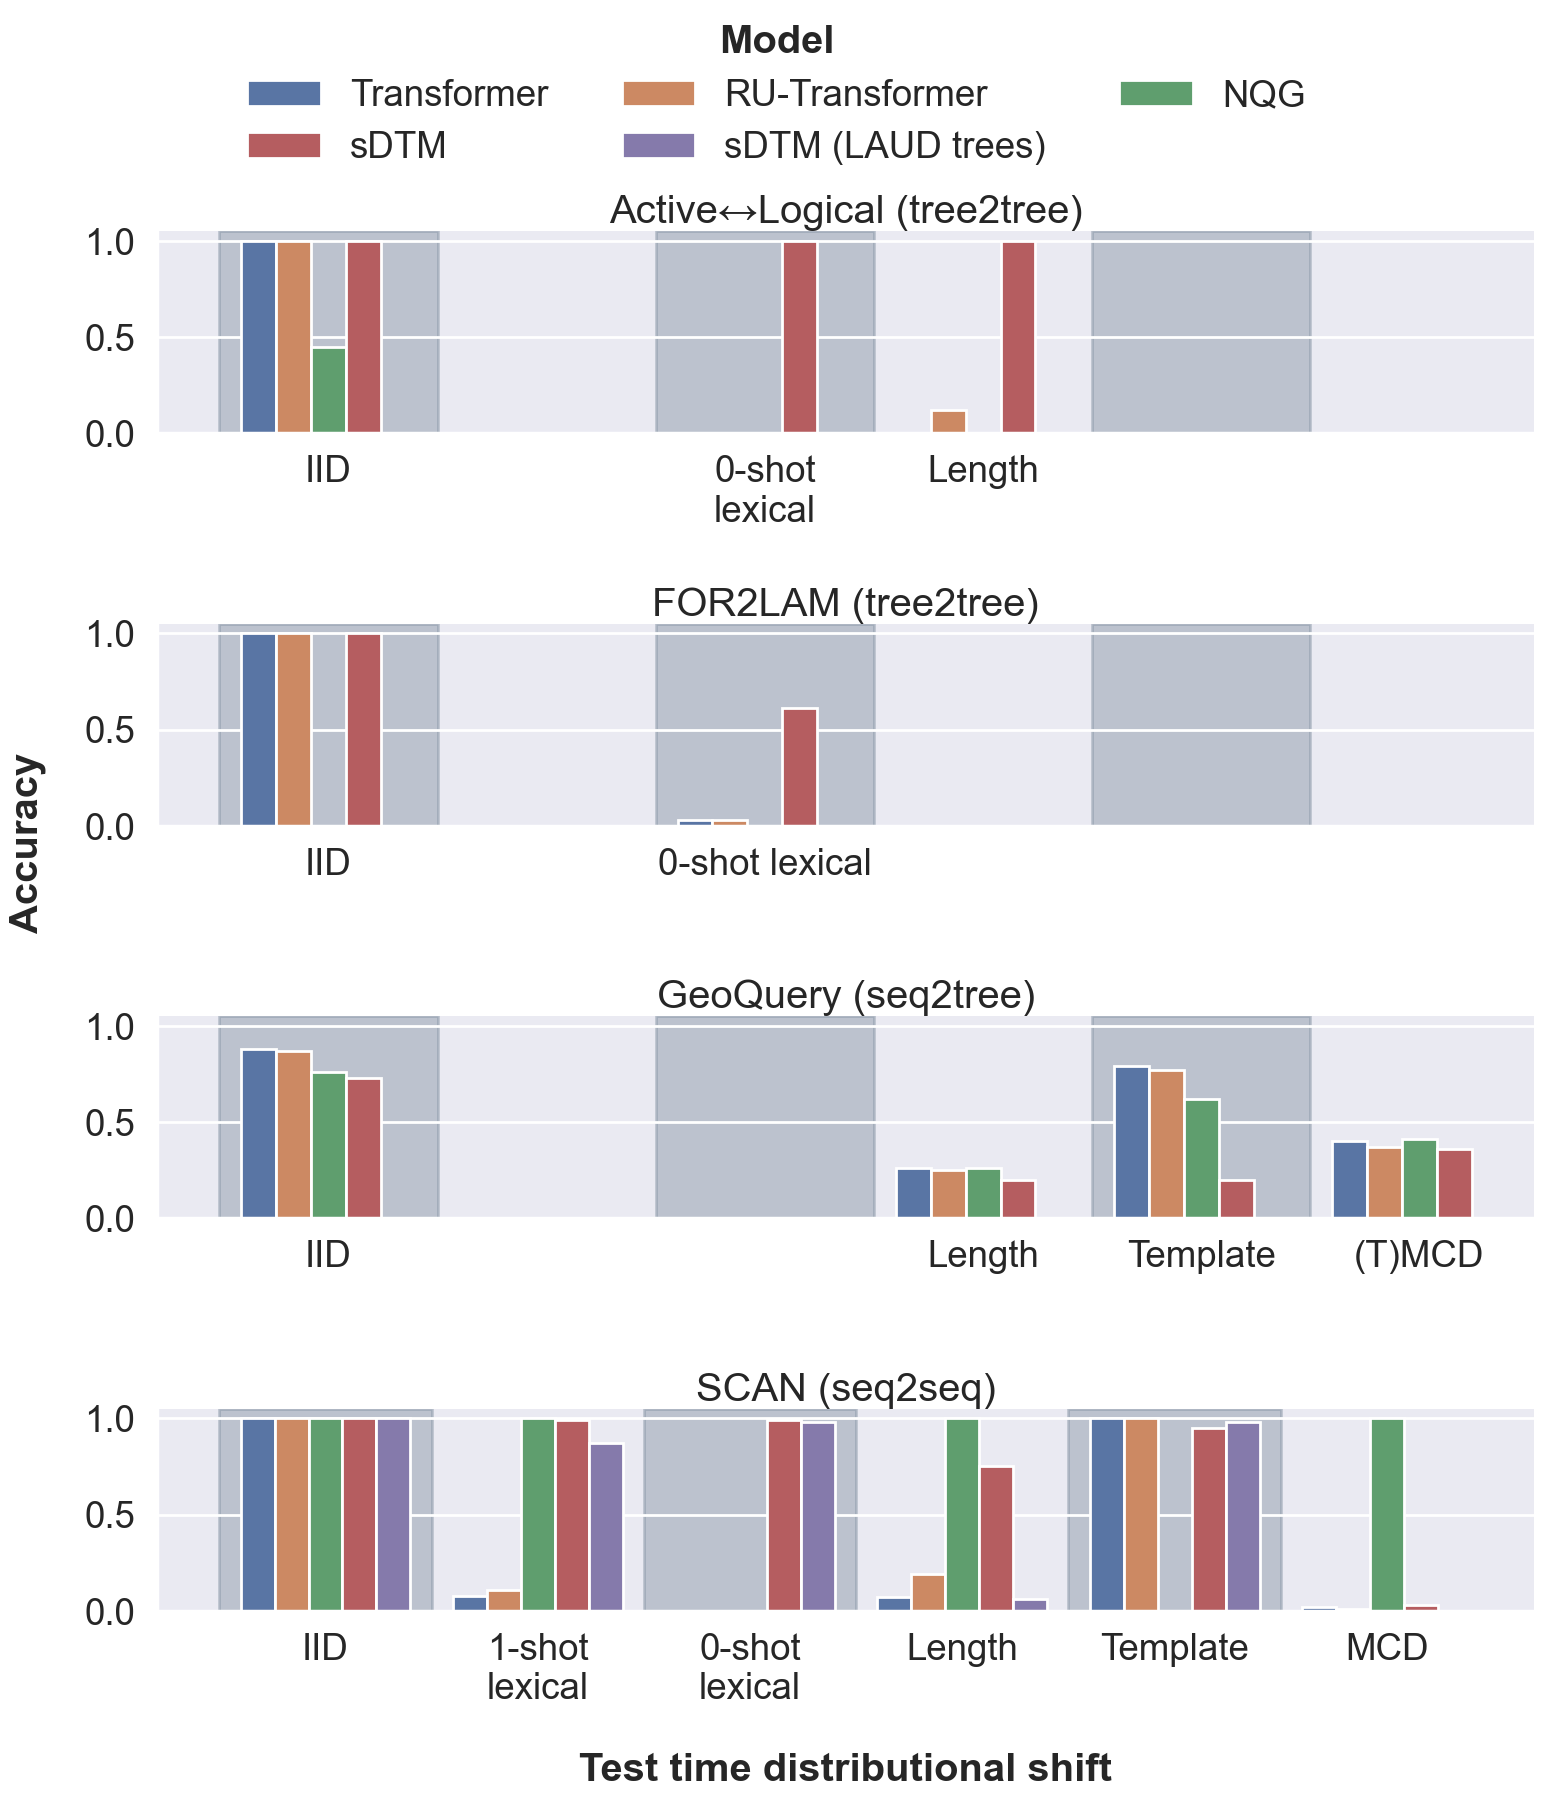

In [198]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=1.2)


hue_order = ['Transformer', 'RU-Transformer', 'NQG', 'sDTM', 'sDTM (LAUD trees)']
legend_order = [0, 3, 1, 4, 2]
row_order = ['Active↔Logical', 'FOR2LAM', 'GeoQuery', 'SCAN']
dataset_to_splits = {
    'Active↔Logical': ['IID', '', '0-shot\nlexical', 'Length', '', ''],
    'FOR2LAM': ['IID', '', '0-shot lexical', '', '', ''],
    'GeoQuery': ['IID', '', '', 'Length', 'Template', '(T)MCD'],
    'SCAN': ['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD']
}

g = sns.catplot(df, row='Dataset', hue='Model', x='split', y='Accuracy', kind='bar', height=4, aspect=4,
           row_order=row_order,
            hue_order=hue_order,
            order=['IID', '1-shot lexical', '0-shot lexical', 'Length', 'Template', 'MCD'],
           sharex=False)

plt.yticks([0, .5, 1])

model_to_title = {
    'Active↔Logical': 'Active↔Logical (tree2tree)',
    'FOR2LAM': 'FOR2LAM (tree2tree)',
    'GeoQuery': 'GeoQuery (seq2tree)',
    'SCAN': 'SCAN (seq2seq)'
}


# Iterate over all axes to draw the x tick labels and the alternating background
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_to_title[row_order[i]])
    for j in range(0, 6, 2):
        ax.axvspan(j - 0.5, j + 0.5, color='lightslategray', alpha=.4, zorder=-1)
    if row_order[i] == 'SCAN':
        rotation = 0
    else:
        rotation = 0
    #ax.tick_params(axis='x', labelbottom=True)
    ax.set_xticklabels(dataset_to_splits[row_order[i]], rotation=rotation)
    ax.set_ylabel('')

    
# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()    
g.legend.get_title().set_fontweight('bold')

sns.move_legend(
    g, 
    "upper center", 
    handles=[handles[idx] for idx in legend_order],
    labels=[labels[idx] for idx in legend_order],
    bbox_to_anchor=(0.4, 1.1), 
    ncol=3
)

plt.ylabel('Accuracy', fontweight='bold')
ax.yaxis.set_label_coords(-.08, 3.8)
for i, ax in enumerate(g.axes.flat):
    plt.setp(dataset_to_splits[row_order[i]])
        
plt.xlabel('\nTest time distributional shift', fontweight='bold')
# plt.ylabel('Accuracy') TODO: should I have a y axis label?
#plt.tight_layout()

plt.savefig('per_model_performance.svg', bbox_inches='tight')
plt.show()

## Averaged plot (main conference poster)

/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/652373835.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'],
/Users/psoulos/opt/anaconda3/envs/blackboard2/lib/python3.8/site-packages/seaborn/utils.py:493: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)
/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/652373835.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD'])


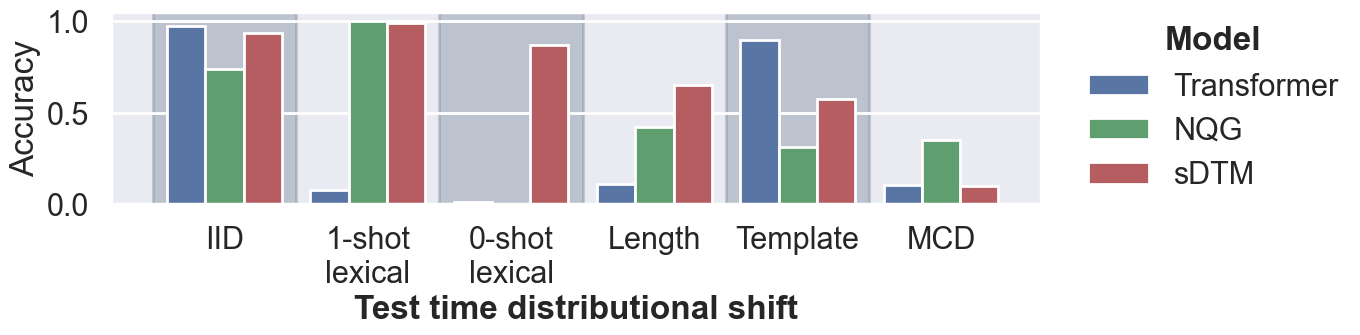

In [227]:
plt.figure(figsize=(12, 2.5))
sns.set_context('poster')

palette = sns.color_palette()

g = sns.barplot(
    df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'],
    x='split', 
    y='Accuracy', 
    hue='Model', 
    errorbar=None,
    palette=[palette[0], palette[2], palette[3]]
)

handles, labels = plt.gca().get_legend_handles_labels()

sns.move_legend(
    g, 
    "upper right", 
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.35, 1.07), 
    ncol=1,
    title_fontproperties={
        'weight': 'bold'
    },
    facecolor='#FFFFFFFF',
    edgecolor='#FFFFFFFF'
)
ax = g.axes
ax.set_xticklabels(['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD'])

#ax.set_title(model_to_title[row_order[i]])
for j in range(0, 6, 2):
    ax.axvspan(j - 0.5, j + 0.5, color='lightslategray', alpha=.4, zorder=-1)
    
plt.xlabel('Test time distributional shift', fontweight='bold')
plt.savefig('average_performance.svg', bbox_inches='tight')

## Per architecture plot (workshop poster)

/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/2628863569.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dataset_to_splits[row_order[i]], rotation=rotation)
/Users/psoulos/opt/anaconda3/envs/blackboard2/lib/python3.8/site-packages/seaborn/utils.py:493: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


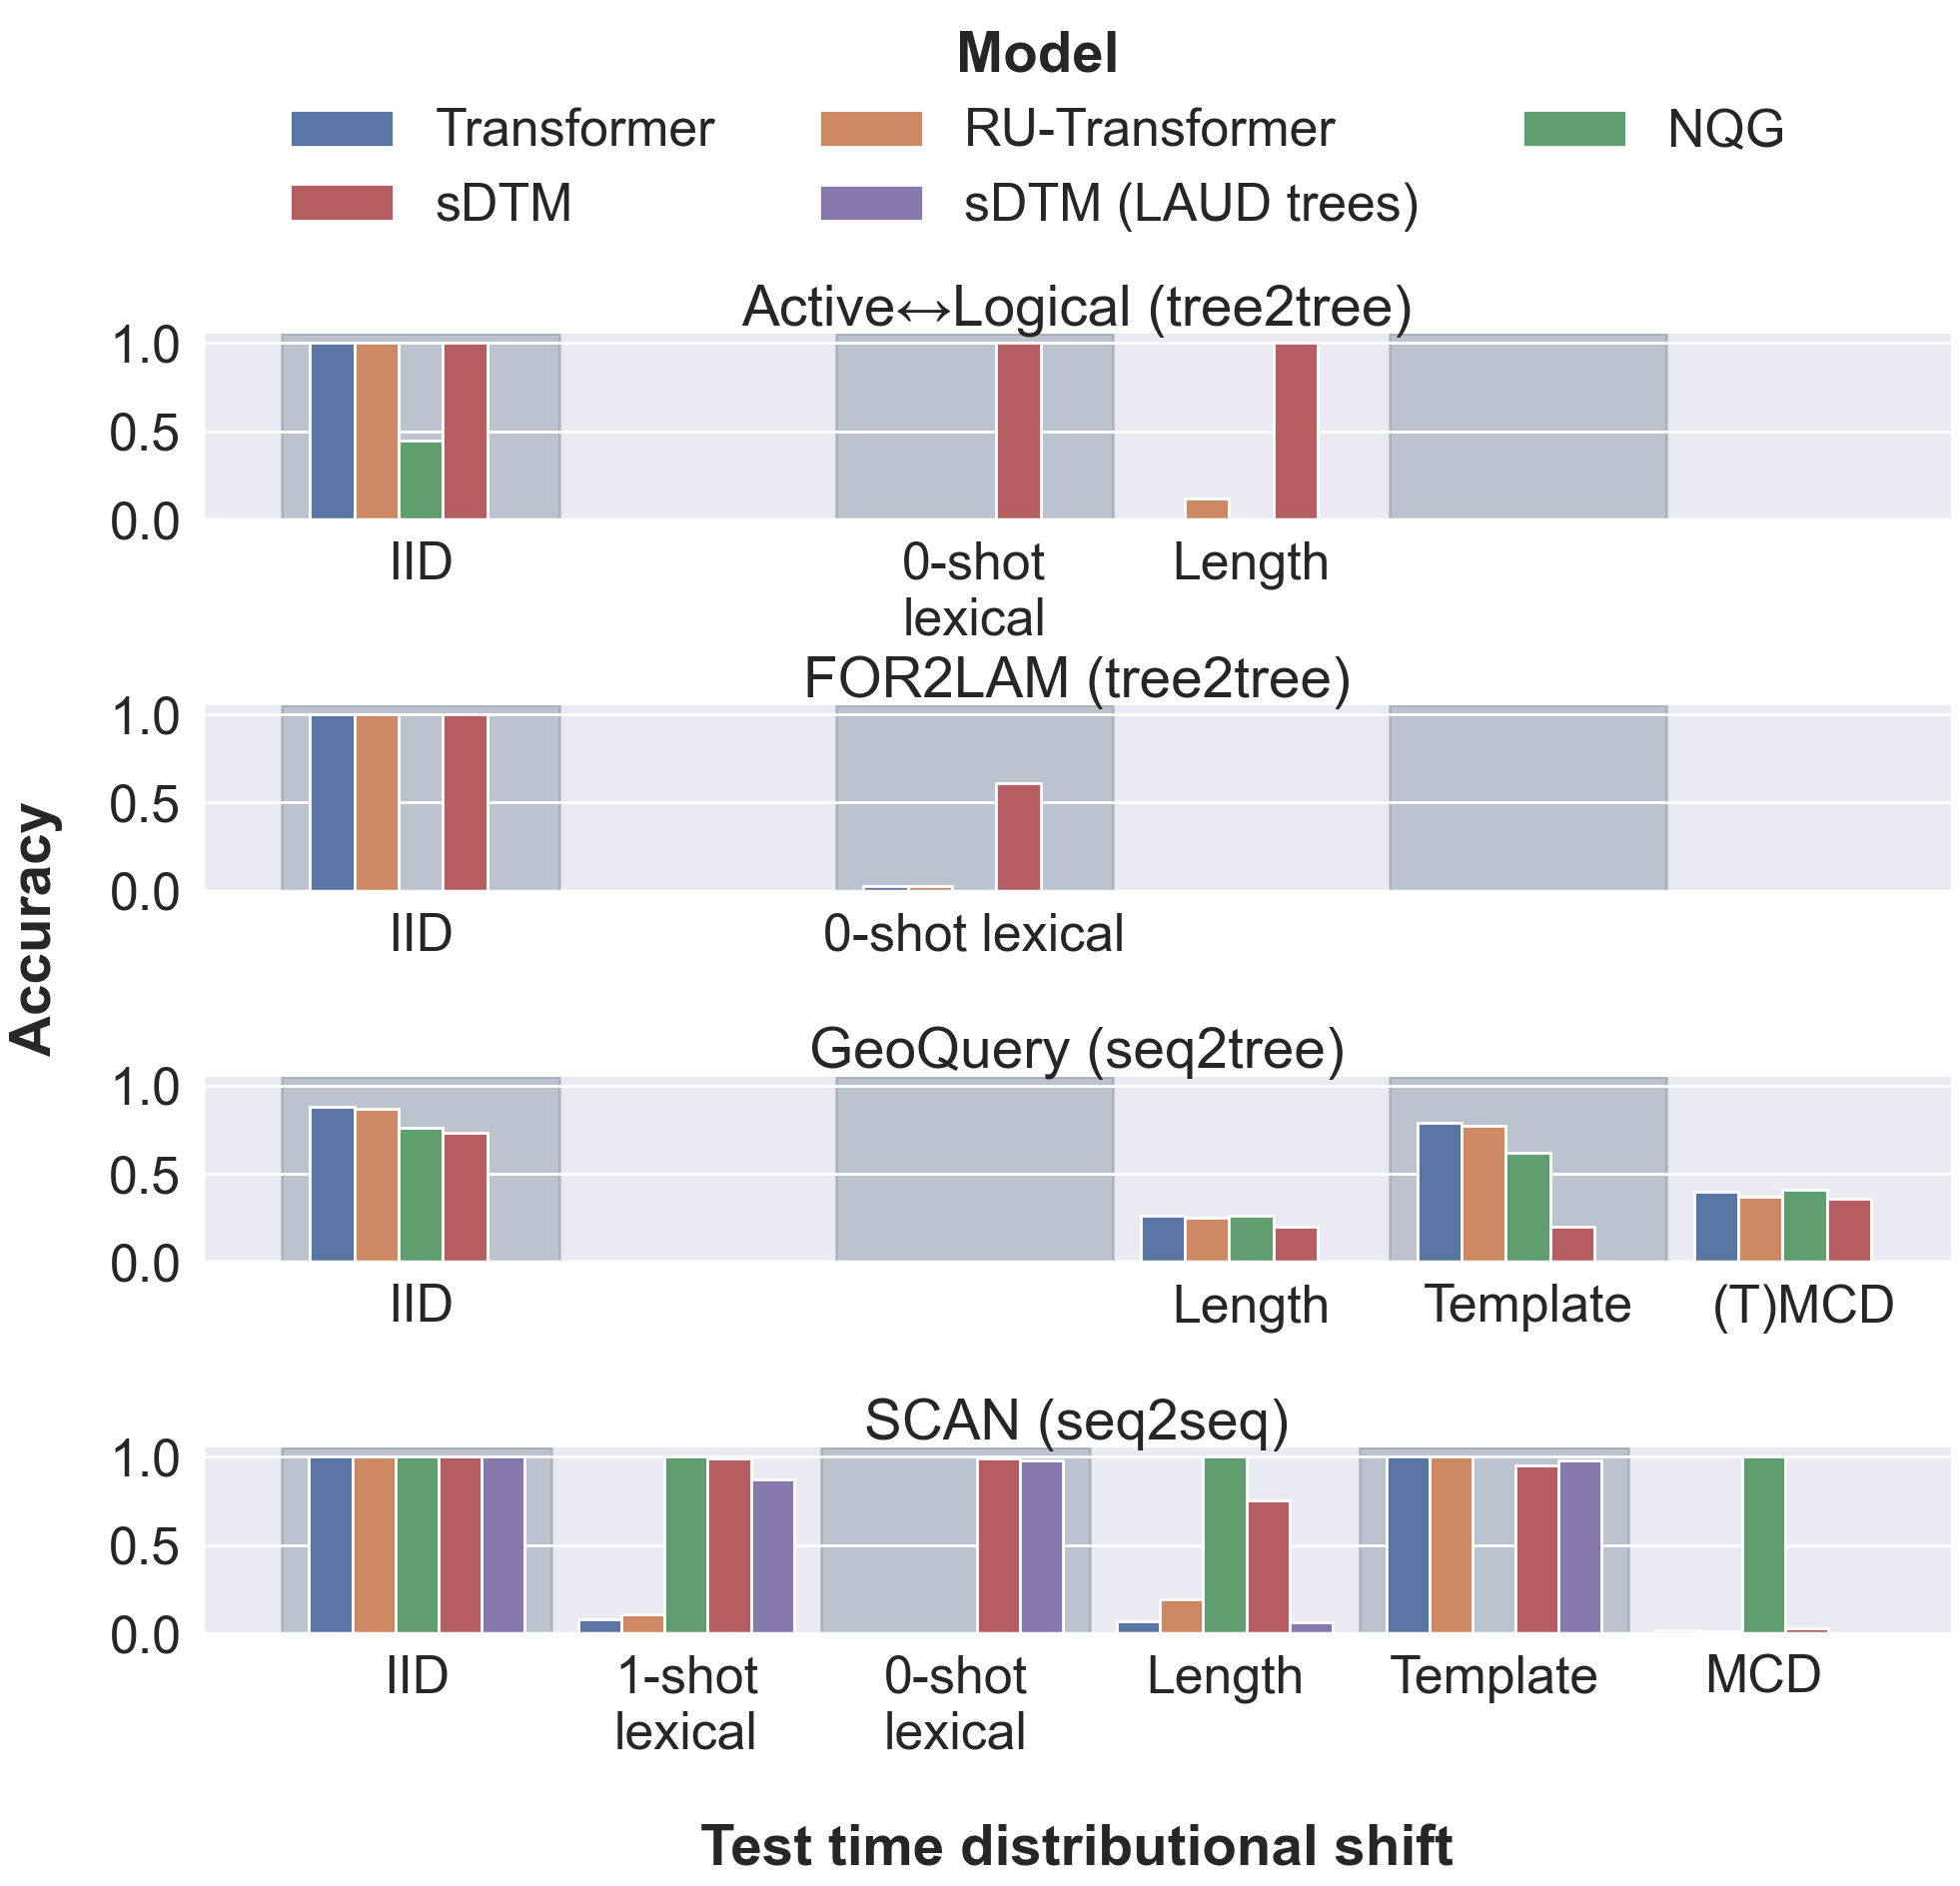

In [221]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

sns.set_context("poster", font_scale=1.7)


hue_order = ['Transformer', 'RU-Transformer', 'NQG', 'sDTM', 'sDTM (LAUD trees)']
legend_order = [0, 3, 1, 4, 2]
row_order = ['Active↔Logical', 'FOR2LAM', 'GeoQuery', 'SCAN']
dataset_to_splits = {
    'Active↔Logical': ['IID', '', '0-shot\nlexical', 'Length', '', ''],
    'FOR2LAM': ['IID', '', '0-shot lexical', '', '', ''],
    'GeoQuery': ['IID', '', '', 'Length', 'Template', '(T)MCD'],
    'SCAN': ['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD']
}

g = sns.catplot(df, row='Dataset', hue='Model', x='split', y='Accuracy', kind='bar', height=4, aspect=5,
           row_order=row_order,
            hue_order=hue_order,
            order=['IID', '1-shot lexical', '0-shot lexical', 'Length', 'Template', 'MCD'],
           sharex=False)

plt.yticks([0, .5, 1])

model_to_title = {
    'Active↔Logical': 'Active↔Logical (tree2tree)',
    'FOR2LAM': 'FOR2LAM (tree2tree)',
    'GeoQuery': 'GeoQuery (seq2tree)',
    'SCAN': 'SCAN (seq2seq)'
}


# Iterate over all axes to draw the x tick labels and the alternating background
for i, ax in enumerate(g.axes.flat):
    ax.set_title(model_to_title[row_order[i]])
    for j in range(0, 6, 2):
        ax.axvspan(j - 0.5, j + 0.5, color='lightslategray', alpha=.4, zorder=-1)
    if row_order[i] == 'SCAN':
        rotation = 0
    else:
        rotation = 0
    #ax.tick_params(axis='x', labelbottom=True)
    ax.set_xticklabels(dataset_to_splits[row_order[i]], rotation=rotation)
    ax.set_ylabel('')

    
# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()    
g.legend.get_title().set_fontweight('bold')

sns.move_legend(
    g, 
    "upper left", 
    handles=[handles[idx] for idx in legend_order],
    labels=[labels[idx] for idx in legend_order],
    bbox_to_anchor=(.1, 1.15), 
    ncol=3
)

plt.ylabel('Accuracy', fontweight='bold')
ax.yaxis.set_label_coords(-.08, 3.8)
for i, ax in enumerate(g.axes.flat):
    plt.setp(dataset_to_splits[row_order[i]])
        
plt.xlabel('\nTest time distributional shift', fontweight='bold')
# plt.ylabel('Accuracy') TODO: should I have a y axis label?
#plt.tight_layout()
plt.subplots_adjust(hspace = 1)

plt.savefig('per_model_performance_workshop.svg', bbox_inches='tight')
plt.show()

## Averaged plot (workshop poster)

/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/804191641.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'],
/Users/psoulos/opt/anaconda3/envs/blackboard2/lib/python3.8/site-packages/seaborn/utils.py:493: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)
/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/804191641.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD'])


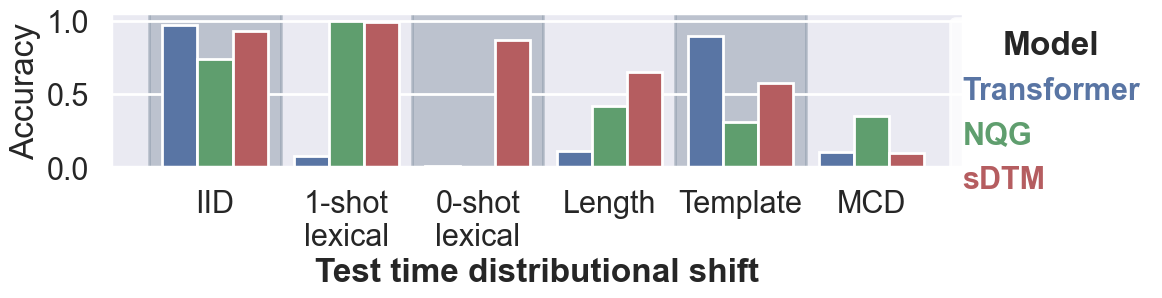

In [206]:
plt.figure(figsize=(11, 2))
sns.set_context('poster')

palette = sns.color_palette()

g = sns.barplot(
    df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'],
    x='split', 
    y='Accuracy', 
    hue='Model', 
    errorbar=None,
    palette=[palette[0], palette[2], palette[3]]
)

plt.yticks([0, .5, 1])

#handles, labels = plt.gca().get_legend_handles_labels()
# Customize the legend
handles, labels = plt.gca().get_legend_handles_labels()
# Create new handles with zero-length lines
handles = [plt.Line2D([], [], color=handle.get_facecolor(), label=label, markersize=0, marker='None') 
               for handle, label in zip(handles, labels)]

sns.move_legend(
    g, 
    "upper right", 
    handles=handles,
    labels=labels,
    bbox_to_anchor=(1.24, 1.07), 
    ncol=1,
    prop={
        'weight': 599
    },
    title_fontproperties={
        'weight': 'bold'
    },
    facecolor='#FFFFFFFF',
    edgecolor='#FFFFFFFF',
    handlelength=0,
    handleheight=0,
    handletextpad=0,
)

ax = g.axes
ax.set_xticklabels(['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD'])

# Color the text labels to match the line colors
for text, color in zip(ax.get_legend().get_texts(), handles):
    text.set_color(color.get_color())

#ax.set_title(model_to_title[row_order[i]])
for j in range(0, 6, 2):
    ax.axvspan(j - 0.5, j + 0.5, color='lightslategray', alpha=.4, zorder=-1)
    
plt.xlabel('Test time distributional shift', fontweight='bold')
plt.savefig('average_performance_workshop.svg', bbox_inches='tight')

In [205]:
ax.get_legend_handles_labels()

([<matplotlib.patches.Rectangle at 0x7fc3ec1ab4f0>,
 ['Transformer', 'RU-Transformer', 'NQG', 'sDTM', 'sDTM (LAUD trees)'])

## System 2 Reasoning Talk 

/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/173023383.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'][df['Model'] != 'sDTM'],
/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/173023383.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'][df['Model'] != 'sDTM'],
/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/173023383.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.barplot(
/Users/psoulos/opt/anaconda3/envs/blackboard2/lib/python3.8/site-packages/seaborn/utils.py:493: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)
/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/i

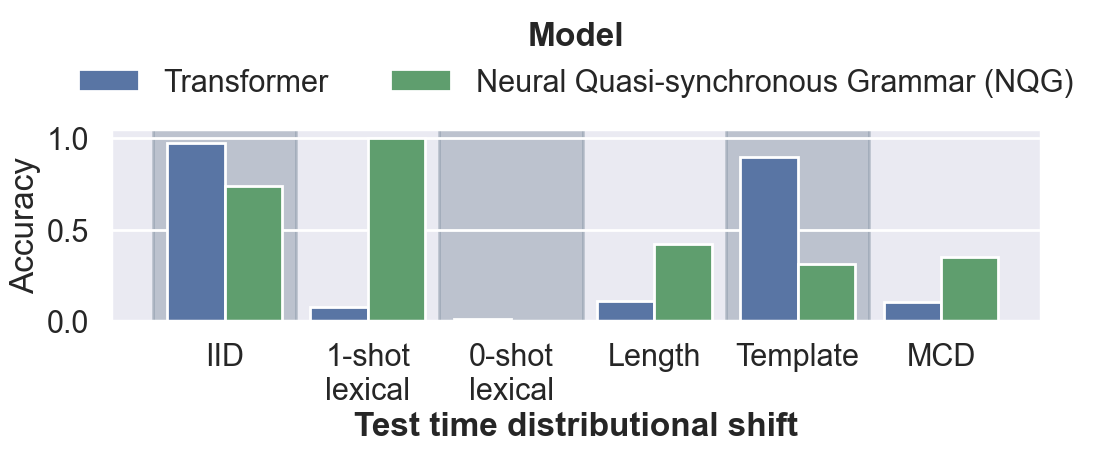

In [247]:
plt.figure(figsize=(12, 2.5))
sns.set_context('poster')

palette = sns.color_palette()

df.loc[df['Model'] == 'NQG', 'Model'] = 'Neural Quasi-synchronous Grammar (NQG)'

g = sns.barplot(
    df[df['Model'] != 'sDTM (LAUD trees)'][df['Model'] != 'RU-Transformer'][df['Model'] != 'sDTM'],
    x='split', 
    y='Accuracy', 
    hue='Model', 
    errorbar=None,
    palette=[palette[0], palette[2], palette[3]]
)

handles, labels = plt.gca().get_legend_handles_labels()

sns.move_legend(
    g, 
    "upper center", 
    handles=handles,
    labels=labels,
    bbox_to_anchor=(.5, 1.7), 
    ncol=2,
    title_fontproperties={
        'weight': 'bold'
    },
    facecolor='#FFFFFFFF',
    edgecolor='#FFFFFFFF'
)
ax = g.axes
ax.set_xticklabels(['IID', '1-shot\nlexical', '0-shot\nlexical', 'Length', 'Template', 'MCD'])

#ax.set_title(model_to_title[row_order[i]])
for j in range(0, 6, 2):
    ax.axvspan(j - 0.5, j + 0.5, color='lightslategray', alpha=.4, zorder=-1)
    
plt.xlabel('Test time distributional shift', fontweight='bold')
plt.savefig('average_performance_no_dtm.svg', bbox_inches='tight', transparent=True)

/var/folders/v0/h7vgsx8d0qx3jvpddrpv49km0000gn/T/ipykernel_7712/399058483.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


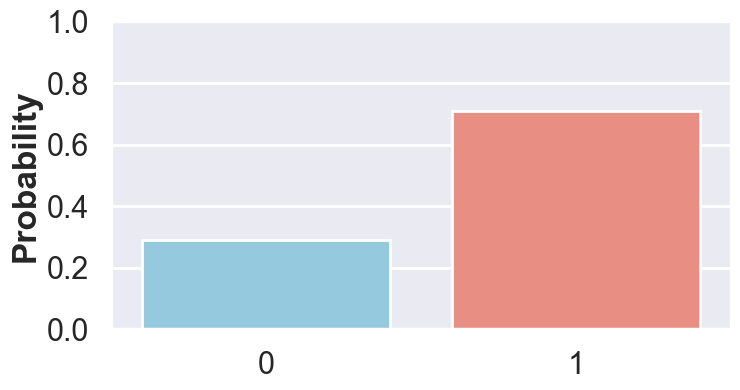

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parameters
p = 0.7  # Probability of success
n_samples = 1000  # Number of samples

# Generate Bernoulli distributed data
data = np.random.binomial(n=1, p=p, size=n_samples)

# Convert to a DataFrame for seaborn compatibility
df = pd.DataFrame({'Outcome': data})

# Count the outcomes for visualization
outcome_counts = df['Outcome'].value_counts(normalize=True).sort_index()

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.barplot(
    x=outcome_counts.index,
    y=outcome_counts.values,
    palette=['skyblue', 'salmon']
)
plt.title('', fontweight='bold')
plt.xlabel('', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.xticks([0, 1], ['0', '1'])
plt.ylim(0, 1)
plt.savefig('bernoulli.svg', bbox_inches='tight', transparent=True)